# Complete project

On this notebook, we have the complete code of the project, which is also on notebook1. On notebook1, the code is explained in detail, but here only the code is shown. On **Task C** section (see at the end), we evaluate the performance of some of the learning algorithms used.

### Credit Card Dataset

Scores of each feature (Credit Card): 
[4.798e+01 2.355e+01 1.778e+01 5.789e+00 3.538e+03 2.239e+03 1.757e+03
 1.477e+03 1.305e+03 1.085e+03 1.158e+01 6.044e+00 5.944e+00 3.095e+00
 1.371e+00 8.658e-01 1.604e+02 1.033e+02 9.522e+01 9.719e+01 9.143e+01
 8.509e+01       inf]

Selected features (Credit Card): 
[[2 2 -1 1]
 [-1 2 0 1]
 [0 0 0 0]
 ...
 [4 3 2 1]
 [1 -1 0 1]
 [0 0 0 1]]


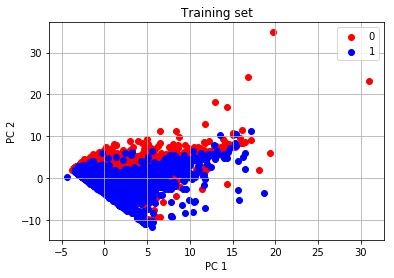

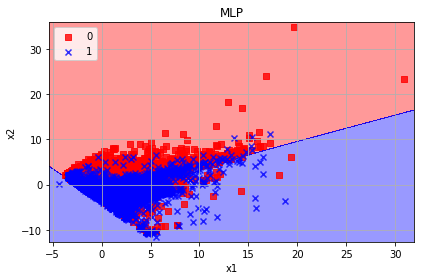

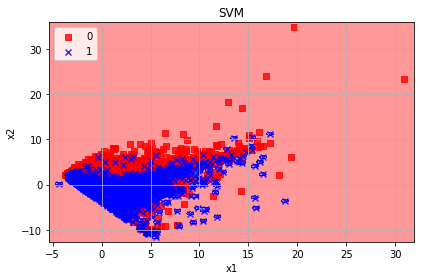

In [1]:
#numeric
import numpy as np
import pandas as pd
import xlrd
from pandas import DataFrame, read_csv
# graphics
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
#Disable warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from numpy import linalg as LA
from matplotlib.colors import ListedColormap
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from random import uniform
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

#### Build table

df = pd.read_excel('default_credit_card_clients.xls')

# assign names to columns
df.columns = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 
              'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
              'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']

df = df.drop(['ID'])


#### Rank features (univariate selection)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif, f_classif
import numpy

if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split
    
y=df.as_matrix(columns=[df.columns[23]])

X=df.as_matrix(columns=df.columns[1:])

#feature extraction
test = SelectKBest(f_classif, k=4)
fit = test.fit(X, y)

numpy.set_printoptions(precision=3)
print("Scores of each feature (Credit Card): ")
print(fit.scores_)

features = fit.transform(X)

print("\nSelected features (Credit Card): ")
print(features)


#### Perform dimension reduction

# standardize data
sc = StandardScaler()
X_train_std = sc.fit_transform(X)

# apply PCA 
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)

#pca.explained_variance_ratio_

# compute plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.figure
inx =(y==0)
inx=inx.ravel()
ax.scatter(X_train_pca[inx,0],X_train_pca[inx,1],marker='o',c='r', label='0')
inx =(y==1)
inx=inx.ravel()
ax.scatter(X_train_pca[inx,0],X_train_pca[inx,1],marker='o',c='b', label='1')
ax.set_title("Training set")
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.legend()
ax.grid()
plt.show()

#### Training Model (Task B)

#this function was taken from the class guide "Linear models for Classification"
def plot_decision_regions(X, y, classifier, resolution=0.02): 
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) 
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap) 
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
            alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

# MLP
# function for tuning the hyper-parameters of the estimator
def mlp_tunning(X_train, y, clf):

    parameters = {
    'hidden_layer_sizes': [(100,)],
    'activation': ['tanh'],
    'alpha': [uniform(0.0001, 0.9)],
    'learning_rate': ['constant','adaptive'],
    'max_iter': [1000,2000,3000,4000,5000] }

    grid_search = GridSearchCV(estimator=clf, param_grid=parameters, n_jobs=-1,scoring='accuracy', cv=5,)

    grid_search.fit(X_train, y)

    best_accuracy = grid_search.best_score_
    best_parameters = grid_search.best_params_

    print("Best accuracy: ", best_accuracy)
    print("Best parameters: ", best_parameters)

    return best_parameters

#uncomment to find best hyper-parameters
#clf = MLPClassifier()    
#best_parameters = mlp_tunning(X_train_pca,y,clf)

mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(100,),alpha=0.6734629975330131, learning_rate= 'constant', max_iter=2000)

a = np.array(y)
y = a.ravel()
y = y.tolist()

mlp.fit(X_train_pca,y)
plot_decision_regions(X_train_pca, y, classifier=mlp) 
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.grid()
plt.title('MLP')
plt.tight_layout()
plt.show()

# SVM
# function for tuning the hyper-parameters of the estimator
def svc_tunning(X_train, y, clf):

    parameters = [{'C': np.logspace(-3, 2, 6), 'kernel': ['rbf'],
                   'gamma': np.logspace(-3, 2, 6)}]

    grid_search = GridSearchCV(estimator=clf, param_grid=parameters, n_jobs=-1,scoring='accuracy', cv=5,)

    grid_search.fit(X_train, y)

    best_accuracy = grid_search.best_score_
    best_parameters = grid_search.best_params_

    print("Best accuracy: ", best_accuracy)
    print("Best parameters: ", best_parameters)

    return best_parameters

#uncomment to find best hyper-parameters
#clf = SVC()
#best_parameters = svc_tunning(X_train_pca,y, clf)

svm=SVC(C=1.0,kernel='rbf',gamma=10.0)

svm.fit(X_train_pca,y)

plot_decision_regions(X_train_pca, y, classifier=svm) 
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.grid()
plt.title('SVM')
plt.tight_layout()
plt.show()

### Adult Dataset

Scores of each feature (Adult): 
[7.928e+03 2.723e+02 1.423e+05 7.424e+00 2.178e+03 2.888e+03 9.492e+01
 4.313e+02 2.759e+02 1.852e+02 7.413e+07 1.256e+06 5.569e+03 1.349e+03
 4.515e+03]

Selected features (Adult): 
[[3.900e+01 7.752e+04 2.174e+03 0.000e+00]
 [5.000e+01 8.331e+04 0.000e+00 0.000e+00]
 [3.800e+01 2.156e+05 0.000e+00 0.000e+00]
 ...
 [5.800e+01 1.519e+05 0.000e+00 0.000e+00]
 [2.200e+01 2.015e+05 0.000e+00 0.000e+00]
 [5.200e+01 2.879e+05 1.502e+04 0.000e+00]]


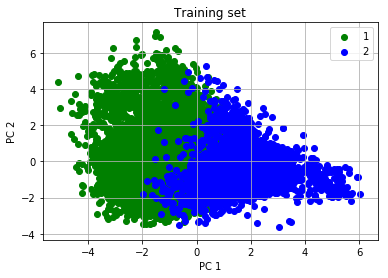

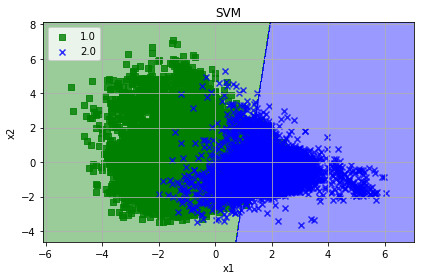

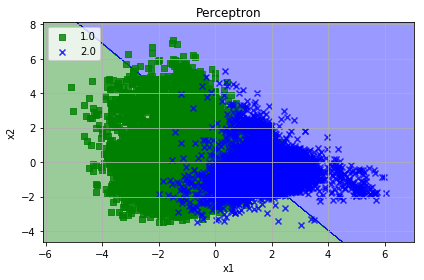

In [2]:
#numeric
import numpy as np
import pandas as pd
import xlrd
from pandas import DataFrame, read_csv
# graphics
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
#Disable warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split
    import numpy as np
from numpy import linalg as LA
from matplotlib.colors import ListedColormap
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import Perceptron
from random import uniform


#### Build table

data = pd.read_csv('adult.data.txt', delimiter=", ", header=None, engine='python')

# assign names to columns
data.columns = ["age", "workclass", "fnlwgt", "education", "education-num", \
                "marital-status" ,"occupation", "relationship", "race", "sex" ,\
                "capital-gain", "capital-loss", "hours-per-week", "native-country", \
                "probability-label"]


#### Mapping categorical data into numerical data

workclass_map = {'Private': 1,'Self-emp-not-inc': 2,'Self-emp-inc': 3,'Federal-gov': 4,'Local-gov': 5,
                               'State-gov': 6,'Without-pay': 7,'Never-worked': 8}

education_map = {'Bachelors': 1,'Some-college': 2,'11th': 3,'HS-grad': 4,'Prof-school': 5,
                                 'Assoc-acdm': 6,'Assoc-voc': 7,'9th': 8,'7th-8th': 9,'12th': 10,'Masters': 11,
                                 '1st-4th': 12,'10th': 13,'Doctorate': 14,'5th-6th': 15,'Preschool': 16}

marital_map = {'Married-civ-spouse': 1,'Divorced': 2,'Never-married': 3,'Separated': 4,
                                   'Widowed': 5,'Married-spouse-absent': 6,'Married-AF-spouse': 7}

occupation_map = {'Tech-support': 1,'Craft-repair': 2,'Other-service': 3,'Sales': 4,
                                'Exec-managerial': 5,'Prof-specialty': 6,'Handlers-cleaners': 7,
                                'Machine-op-inspct': 8,'Adm-clerical': 9,'Farming-fishing': 10,
                                'Transport-moving': 11,'Priv-house-serv': 12,'Protective-serv': 13,
                                'Armed-Forces': 14}

relationship_map = {'Wife': 1,'Own-child': 2,'Husband': 3,'Not-in-family': 4,
                                      'Other-relative': 5,'Unmarried': 6}

race_map = {'White': 1,'Asian-Pac-Islander': 2,'Amer-Indian-Eskimo': 3,'Other': 4,'Black': 5}

sex_map = {'Female': 1,'Male': 2}

country_map = {'United-States': 1,'Cambodia': 2,'England': 3,'Puerto-Rico': 4,
                                   'Canada': 5,'Germany': 6,'Outlying-US(Guam-USVI-etc)': 7,'India': 8,
                                   'Japan': 9,'Greece': 10,'South': 11,'China': 12,'Cuba': 13,'Iran': 14,
                                   'Honduras': 15,'Philippines': 16,'Italy': 17,'Poland': 18,'Jamaica': 19,
                                   'Vietnam': 20,'Mexico': 21,'Portugal': 22,'Ireland': 23,'France': 24,
                                   'Dominican-Republic': 25,'Laos': 26,'Ecuador': 27,'Taiwan': 28,'Haiti': 29,
                                   'Columbia': 30,'Hungary': 31,'Guatemala': 32,'Nicaragua': 33,'Scotland': 34,
                                   'Thailand': 35,'Yugoslavia': 36,'El-Salvador': 37,'Trinadad&Tobago': 38,
                                   'Peru': 39,'Hong': 40,'Holand-Netherlands': 41}

probability_map = {'<=50K': 1, '>50K' : 2}

data['workclass'] = data['workclass'].map(workclass_map)
data['education'] = data['education'].map(education_map)
data['marital-status'] = data['marital-status'].map(marital_map)
data['occupation'] = data['occupation'].map(occupation_map)
data['relationship'] = data['relationship'].map(relationship_map)
data['race'] = data['race'].map(race_map)
data['sex'] = data['sex'].map(sex_map)
data['native-country'] = data['native-country'].map(country_map)
data['probability-label'] = data['probability-label'].map(probability_map)

data = data.dropna(how="any")

#### Rank features (Univariate Feature Selection)

array = data.values

X2 = array[:,0:15]
Y2 = array[:,14]

#feature extraction (k=number of top features to select)
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X2, Y2)

#numpy.set_printoptions(precision=3)
print("Scores of each feature (Adult): ")
print(fit.scores_)

features = fit.transform(X2)

print("\nSelected features (Adult): ")
print(features)

#### Perform dimension reduction

# standardize the data
sc = StandardScaler()
X_train_std = sc.fit_transform(X2)

# apply PCA
pca = PCA(n_components=2)
pc_X = pca.fit_transform(X_train_std)

#pca.explained_variance_ratio_

# computing plot
#label 1 = below 50K
#label 2 = above 50K
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.figure
inx =(Y2==1)
inx=inx.ravel()
ax.scatter(pc_X[inx,0],pc_X[inx,1],marker='o',c='g', label='1')
inx =(Y2==2)
inx=inx.ravel()
ax.scatter(pc_X[inx,0],pc_X[inx,1],marker='o',c='b', label='2')
ax.set_title("Training set")
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.legend()
ax.grid()
plt.show()

#### Training Model (Task B)

#this function was taken from the class guide "Linear models for Classification"
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x')
    colors = ('green', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
            alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

# SVM
# function for tuning the hyper-parameters of the estimator
def svc_tunning(X_train, y, clf):

    parameters = [{'C': np.logspace(-3, 2, 6), 'kernel': ['linear'],
                   'gamma': np.logspace(-3, 2, 6)}]

    grid_search = GridSearchCV(estimator=clf, param_grid=parameters, n_jobs=-1,scoring='accuracy', cv=5,)

    grid_search.fit(X_train, y)

    best_accuracy = grid_search.best_score_
    best_parameters = grid_search.best_params_

    print("Best accuracy: ", best_accuracy)
    print("Best parameters: ", best_parameters)

    return best_parameters

#uncomment to find best hyper-parameters
#clf = SVC()
#best_parameters = svc_tunning(pc_X,Y2,clf)

svm1=SVC(C= 0.01, gamma=0.001, kernel= 'linear')
svm1

svm1=svm1.fit(pc_X,Y2)

plot_decision_regions(pc_X, Y2, classifier=svm1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.title('SVM')
plt.grid()
plt.tight_layout()
plt.show()

# Perceptron
# function for tuning the hyper-parameters of the estimator
def perceptron_tunning(X_train, y, clf):

    parameters = [{'warm_start' : [False, True], 'penalty': ['l2'],
                 'alpha': [uniform(0.0001, 0.9)]}]

    grid_search = GridSearchCV(estimator=clf, param_grid=parameters, n_jobs=-1,scoring='accuracy', cv=5,)

    grid_search.fit(X_train, y)

    best_accuracy = grid_search.best_score_
    best_parameters = grid_search.best_params_

    print("Best accuracy: ", best_accuracy)
    print("Best parameters: ", best_parameters)

    return best_parameters

#uncomment to find best hyper-parameters
#clf = Perceptron()    
#best_parameters = perceptron_tunning(pc_X,Y2, clf)

ppn=Perceptron(penalty='l2', alpha=0.4056096238313554, fit_intercept=True, eta0=0.1, n_jobs=1, warm_start=False)

ppn.fit(pc_X,Y2)

plot_decision_regions(pc_X, Y2, classifier=ppn)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.title('Perceptron')
plt.grid()
plt.tight_layout()
plt.show()

# Task C

We were tasked with evaluating the performance of the learning algorithms used on one of the datasets. The dataset chosen for the evaluation was "Credit Card Data".

We made a K-fold cross-validation for estimating the performance of the learning algorithms:
* Support Vector Machine with rbf kernel
* Multilayer Perceptron

After this evaluation, we will compile the results and discuss them.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import cross_val_score

def evaluate(model, x_train, y_train):

    predicted_data = model.predict(x_train)

    print("Score CV - test set:", cross_val_score(model,x_train, y_train, cv=10).mean())
    print("Mean squared error - training set:", mean_squared_error(y_train, predicted_data))
    print("Coefficient of determination - training set:", r2_score(y_train, predicted_data))
    print("Accuracy - training set:", accuracy_score(y_train, predicted_data))
    print("Cross_validation_evaluate: ", cross_val_score(model,x_train,y_train,cv=4))

# Evaluate the model
print("Evaluate model SVM\n")
evaluate(svm, X_train_pca, y)

# Evaluate the model
print("Evaluate model MLP\n")
evaluate(mlp, X_train_pca, y)

from sklearn.model_selection import KFold

kf = KFold(n_splits=4, shuffle=True)

for train, test in kf.split(X_train_pca):
    print("%s %s" % (train, test))